# Value Iteration

### From Reinforced Learning

## Example 4.3

A gambler has the opportunity to make bets on the
outcomes of a sequence of coin flips. If the coin comes up heads, he wins as many dollars as
he has staked on that flip; if it is tails, he loses his stake. The game ends when the gambler
wins by reaching his goal of $\$100$, or loses by running out of money. On each flip, the gambler
must decide what portion of his capital to stake, in integer numbers of dollars. This
problem can be formulated as an undiscounted, episodic, finite MDP. The state is the gambler’s
capital, $s \in {1, 2, . . . , 99}$ and the actions are stakes, $a \in {0, 1, . . . , \min(s, 100−s)}$.

The reward is zero on all transitions
except those on which the gambler
reaches his goal, when it is $+1$.
The state-value function then gives
the probability of winning from each
state. A policy is a mapping from
levels of capital to stakes. The optimal
policy maximizes the probability
of reaching the goal. Let ph denote
the probability of the coin coming
up heads. If $p_{h}$ is known, then the
entire problem is known and it can
be solved, for instance, by value iteration.
Figure 4.3 shows the change
in the value function over successive
sweeps of value iteration, and the
final policy found, for the case of
$p_h = 0.4$. This policy is optimal, but
not unique. In fact, there is a whole
family of optimal policies, all corresponding
to ties for the argmax action
selection with respect to the optimal
value function. Can you guess
what the entire family looks like?



# Expected Results

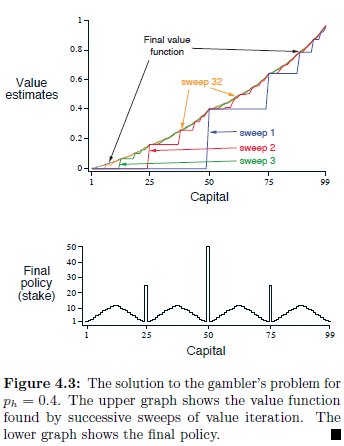

In [1]:
import random
import math
import matplotlib.pyplot as plt

In [63]:
def get_possible_actions(s):
    return [i for i in range(min(s, 100-s)+1)]

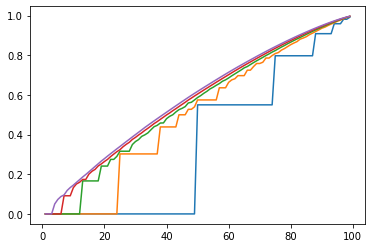

In [87]:
ERROR = 0.1
PH = 0.55

V = []
policy = []

past_V = {}

# create value array all 0 except for 100 which is 1
for i in range(100):
    V.append(0)
    policy.append(0)
V.append(1)

while True:
    delta = 0
    for s in range(1, 100):
        v = V[s]
        q_value = 0
        max_value = 0
        for a in get_possible_actions(s):
            q_value = PH * (V[min(100, s + a)]) + (1 - PH) * (V[s - a])
            if q_value > max_value:
                max_value = q_value
        V[s] = max_value
        delta = max(delta, abs(v - V[s]))
    plt.plot([i for i in range(1, 100)], V[1:100])
    if(delta < ERROR):
        break
    
for s in range(1, 100):
    max_value = 0
    max_action = 0
    for a in get_possible_actions(s):
        q_value = PH * (V[min(100, s + a)]) + (1 - PH) * (V[s - a])
        if q_value > max_value:
            max_value = q_value
            max_action = a
    policy[s] = a

plt.show()

# Value Iteration Results

I started with a version of the code that, like exercise 4.7 iterated through both the value iteration and policy iteration more than once but as seen above, this is the wrong way to go about it. Value iteration combines both steps and thus does not need to run through both policy evaluation and policy improvement separately.

Anyways, the graphs this makes are pretty cool and it does it pretty fast which is cool.

## Policy Results

I didn't get the same results as shown in the book but as far as I can tell this policy probably works too?

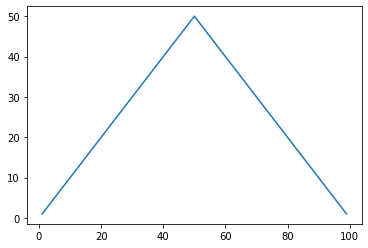

In [88]:
plt.plot([i for i in range(1,100)], policy[1:])
plt.show()